# EDA 
Stands for Exploratory Data Analysis. This is the Preliminary step in data analysis to:
+ Summarize main characteristics of the data.
+ Gain better understanding of the data set.
+ Uncover relationship between variables.
+ Extract important variables


In this module we will try to answer **what are the characteristics that have the most impact on the car price(auto.csv)?** <br/>
# Learning Objectives
+ Descriptive Statistics
+ GroupBy
+ ANOVA(analysis of variance)
+ Correlation
+ Correlation-Statistics

# Descriptive Statistics
 + describe the basic feature of data.
 + Giving short summariies about the sample and measures of the data.
 

Easiest way to do this is by using pandas <code>describe()</code> method. It measures  some basic statistics for numerical variables. NaN values will be autometically ingnored.<code>value_counts()</code> method is used to summarize the categorical variables.

# Boxplot
This is a great way to visualize numeric data. It can visualzes various distribution of the data.
![](https://www.researchgate.net/publication/303779929/figure/fig6/AS:372438601879567@1465807690659/The-main-components-of-a-boxplot-median-quartiles-whiskers-fences-and-outliers.png)

# Scatter Plot
To see contiuous variables in our data we can use **ScatterPlot**. These data points are numbers contained in some range.
![](https://www.learnbyexample.org/wp-content/uploads/r/typical-scatter-plot.png)

# Grouping data
+ Use Pandas <code>groupby()</code> methods.
+ Group data into categories.
+ Single or multiple variables.

## Example

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Animal':["Falcon","Falcon","Parrot","Parrot"],"speed":[380,370,24,26]})

In [3]:
df

,Animal,speed
0,Falcon,380
1,Falcon,370
2,Parrot,24
3,Parrot,26


In [5]:
df.groupby(['Animal']).max()

,speed
Animal,
Falcon,380
Parrot,26


# Pivot table in pandas
![](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

In [6]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",

                         "bar", "bar", "bar", "bar"],

                   "B": ["one", "one", "one", "two", "two",

                         "one", "one", "two", "two"],

                   "C": ["small", "large", "large", "small",

                         "small", "large", "small", "small",

                         "large"],

                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],

                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [7]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


## Aggregates values by taking the sum.

In [11]:
import numpy as np


In [24]:
table = pd.pivot_table(df, values='D', index=['A','B'],

                       columns=['C'], aggfunc=np.sum,fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

   ## we can also fill missing values using <code>fill_value</code> argument.
   It is also possible to calculate **multiple types of aggregation** for any given value column.

In [26]:
table = pd.pivot_table(df, values=['D','E'],index=['C','A'],aggfunc={'D':np.mean,'E':np.sum})
table

D   E
C     A                
large bar  5.500000  15
      foo  2.000000   9
small bar  5.500000  17
      foo  2.333333  13

In [27]:
table = pd.pivot_table(df, values = ['D','E'],index = ['A','C'],aggfunc={'D':np.mean,'E':[min,max,np.mean]})
table

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2

# Heatmaps
Heatmap takes a rectangular grid of data and assigns a color to the grid points. It is a great way to plot target variable over multiple variables and through this get visual clues of the relationship between these variables and the target.

In [28]:
import seaborn as sns
%matplotlib inline
glue = sns.load_dataset('glue')
glue.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1


In [31]:
glue_pivot = glue.pivot(index='Model',columns='Task',values='Score')
glue_pivot

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<AxesSubplot:xlabel='Task', ylabel='Model'>

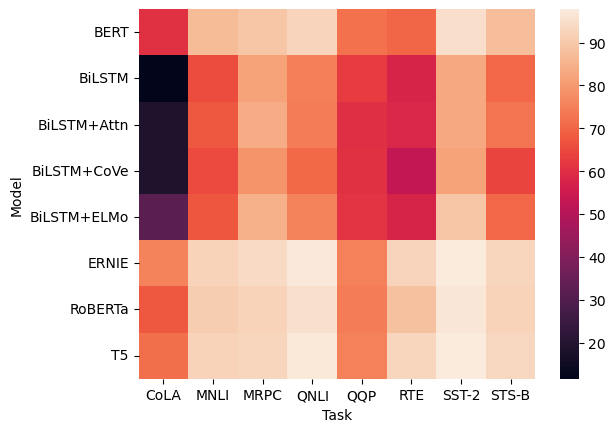

In [32]:
sns.heatmap(glue_pivot)

<code>annot</code> argument works to represent cell values with text

<AxesSubplot:xlabel='Task', ylabel='Model'>

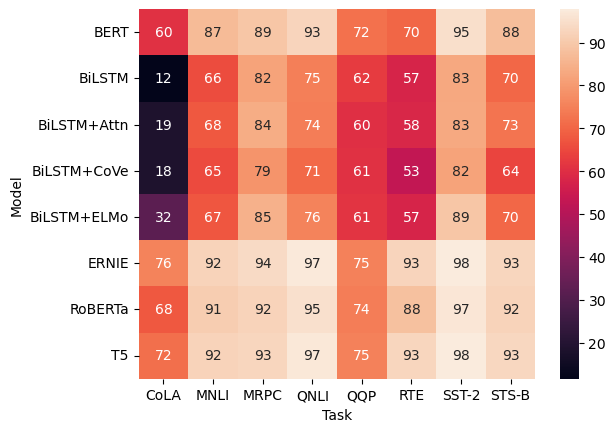

In [33]:
sns.heatmap(glue_pivot,annot=True)

# Correlation
it measures to what extent different variables are independent.<br/>
For example
  + Lung cancer -> Smoking
  + Rain -> Umbrella
**Correlation** does not imply causation.
![](https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2021/08/Img_23.png)

# Pearson Correlation
 + Measure the strength of the correlation between two features.
    + Correlation coefficient.
    + p-Value
 + Correlation Coefficient
    + close to +1: Large Positive relation.
    + close to -1: Large negative relation.
    + close to 0: no relationship.
 + P-Value
     + p<0.0001 Strong
     + p<0.05 Moderate
     + p<01 weak
     + p>0.1 no certainty
 + Strong Correlation
     + correlation coefficient from 1 to -1
     + p value less then 0.001 <br/>
To measure pearson correlation in python we can use from *scipy->stats->pearsonr(x,y)

In [ ]:
df = 